<a href="https://colab.research.google.com/github/Vishwateja05/AIML_25_B16/blob/main/2303A510I5_Q25_B16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
file_path =  './buddymove_holidayiq.csv'
data = pd.read_csv(file_path)

In [7]:
average_ratings = data.drop(columns=["User Id"]).mean().sort_values(ascending=False)
print("Top 5 Attributes for South Indian Destinations:\n", average_ratings)

Top 5 Attributes for South Indian Destinations:
 Nature       124.518072
Picnic       120.401606
Theatre      116.377510
Shopping     112.638554
Religious    109.779116
Sports        11.987952
dtype: float64


In [8]:
most_liked = average_ratings.idxmax()
print("\nMost Liked Travel Spot:", most_liked)


Most Liked Travel Spot: Nature


In [9]:
max_attribute = average_ratings.idxmax()
min_attribute = average_ratings.idxmin()
print("\nMax Attribute:", max_attribute, "with average rating:", average_ratings[max_attribute])
print("Min Attribute:", min_attribute, "with average rating:", average_ratings[min_attribute])


Max Attribute: Nature with average rating: 124.51807228915662
Min Attribute: Sports with average rating: 11.987951807228916


In [10]:
theatre_role = data["Theatre"].describe()
print("\nTheatre Statistics:\n", theatre_role)


Theatre Statistics:
 count    249.000000
mean     116.377510
std       32.132696
min       59.000000
25%       93.000000
50%      113.000000
75%      138.000000
max      213.000000
Name: Theatre, dtype: float64


In [11]:
sports_role = data["Sports"].describe()
print("\nSports Statistics:\n", sports_role)


Sports Statistics:
 count    249.000000
mean      11.987952
std        6.616501
min        2.000000
25%        6.000000
50%       12.000000
75%       18.000000
max       25.000000
Name: Sports, dtype: float64


In [12]:
features = data.drop(columns=["User Id"])
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

In [13]:
print("\nCluster Centers:\n", kmeans.cluster_centers_)


Cluster Centers:
 [[ 17.41836735 113.3877551  166.66326531 139.90816327 114.48979592
  142.63265306]
 [ 15.30952381 159.45238095  85.30952381 108.83333333 179.07142857
  135.88095238]
 [  5.82568807  87.39449541 101.73394495  98.12844037  85.37614679
   94.44954128]]


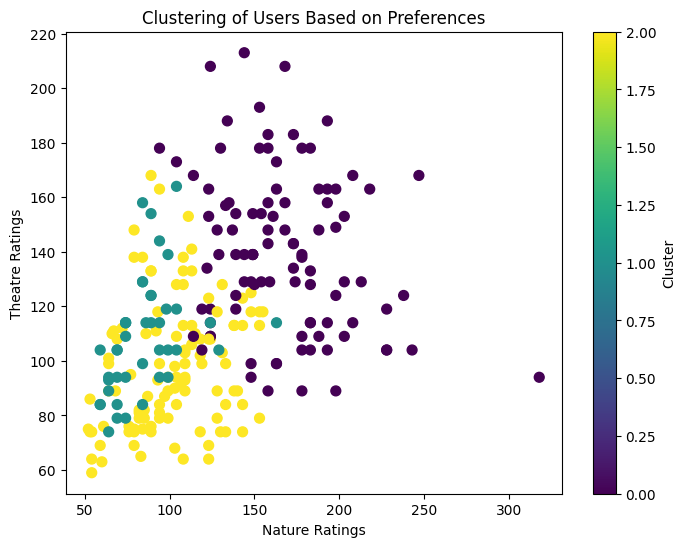

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Nature"], data["Theatre"], c=data['Cluster'], cmap='viridis', s=50)
plt.colorbar(label="Cluster")
plt.xlabel("Nature Ratings")
plt.ylabel("Theatre Ratings")
plt.title("Clustering of Users Based on Preferences")
plt.show()

In [19]:
df = pd.read_csv('buddymove_holidayiq.csv')
df.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [20]:
south_india_means = df[['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']].mean()

In [21]:
top_5_attributes = south_india_means.nlargest(5)

In [22]:
top_5_attributes

,0
Nature,124.518072
Picnic,120.401606
Theatre,116.377510
Shopping,112.638554
Religious,109.779116


In [23]:
most_liked_attribute = south_india_means.idxmax()

In [24]:
print(f"The attribute with the most liked travel spots is: {most_liked_attribute}")


The attribute with the most liked travel spots is: Nature


In [25]:
max_attribute = south_india_means.idxmax()
min_attribute = south_india_means.idxmin()

In [26]:
print(f"The attribute with the maximum value is: {max_attribute}")
print(f"The attribute with the minimum value is: {min_attribute}")

The attribute with the maximum value is: Nature
The attribute with the minimum value is: Sports


In [27]:
beaches_role = df['Nature'].sum()
theatres_role = df['Theatre'].sum()
malls_role = df['Shopping'].sum()
parks_role = df['Picnic'].sum()

In [28]:
print(f"Beaches' Role in South India Tourism: {beaches_role}")
print(f"Theatres' Role in South India Tourism: {theatres_role}")
print(f"Malls' Role in South India Tourism: {malls_role}")
print(f"Parks' Role in South India Tourism: {parks_role}")

Beaches' Role in South India Tourism: 31005
Theatres' Role in South India Tourism: 28978
Malls' Role in South India Tourism: 28047
Parks' Role in South India Tourism: 29980


In [29]:
sports_attributes = df['Sports'].sum()
print(f"\nThe total number of attributes for sports in South India is: {sports_attributes}")


The total number of attributes for sports in South India is: 2985


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [31]:
location_column_name = 'Picnic'

In [32]:
features = df[['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']]

In [33]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

In [35]:
print(df[[location_column_name, 'Cluster']].head())

   Picnic  Cluster
0      95        2
1      68        2
2      75        2
3      61        2
4      86        2


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [37]:
X = df[['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']]
y = df['Nature']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
print(f"Model Accuracy: {clf.score(X_test, y_test)}")

Model Accuracy: 0.34


In [41]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [42]:
# Select numerical columns for clustering
features = df[['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']]

In [44]:
# Apply KMeans clustering (e.g., into 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)